In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

### Decoding the integer sequences back into sequences

In [6]:
#word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

#We reverse it, mapping integer indices to words
reverse_word_index = dict ([(value,key) for (key,value) in word_index.items()])

#We decode the review, note that our indices are offset by 3, 
#because 0,1 and 2 are reversed indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Encoding the integer sequeneces into a binary matrix

In [8]:
import numpy as np

def vectorize_sequences( sequences, dimension =10000):
    #Create an all-zero matrix of shape (len(sequences), dimensions)
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1. #set specific indices of results[i] to 1s
    return results

#Our vectorized training data
x_train = vectorize_sequences(train_data)
#Our vectorized test data
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
#Vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
y_train[0]

1.0

### Model

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))
model.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
#Setting aside validation set
x_valid = x_train[:10000]
partial_x_train = x_train[10000:]

y_valid = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
#Training the model

history = model.fit(partial_x_train, partial_y_train,
                   epochs =5, batch_size=512,
                   validation_data= (x_valid, y_valid))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 4s 296us/step - loss: 0.5085 - acc: 0.7816 - val_loss: 0.3797 - val_acc: 0.8683
Epoch 2/5
15000/15000 [==============================] - 2s 140us/step - loss: 0.3005 - acc: 0.9045 - val_loss: 0.3004 - val_acc: 0.8898
Epoch 3/5
15000/15000 [==============================] - 2s 106us/step - loss: 0.2180 - acc: 0.9289 - val_loss: 0.3083 - val_acc: 0.8717
Epoch 4/5
15000/15000 [==============================] - 2s 105us/step - loss: 0.1751 - acc: 0.9438 - val_loss: 0.2839 - val_acc: 0.8835
Epoch 5/5
15000/15000 [==============================] - 2s 122us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8869


In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Plotting training and validation loss

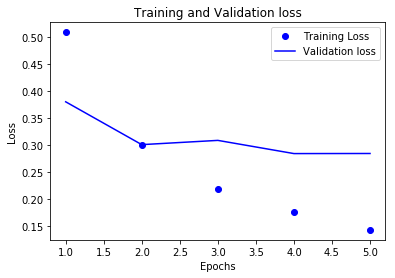

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

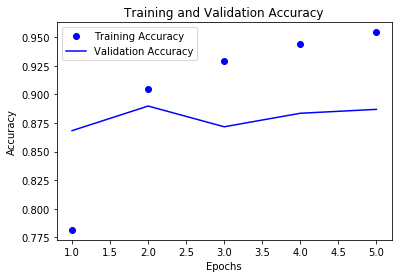

In [17]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Results

In [19]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 81us/step


[0.30681744972229, 0.87748]

### Prediction

In [20]:
model.predict(x_test)

array([[0.2257117 ],
       [0.9989961 ],
       [0.76226884],
       ...,
       [0.07919134],
       [0.0980804 ],
       [0.4132459 ]], dtype=float32)